TELCOM CHURN ANALYSIS

In [2]:
#Import necessary dependencies
import numpy as np
import pandas as pd

In [3]:
# Load the data into a pandas dataframe
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


HANDLING NA VLAUES AND DUPLICATES


In [4]:
# Analysis on null data
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Analysis on duplicated data
data.duplicated().sum()

np.int64(0)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Seperating numercial columns for futher exploratory analysis
numeric_columns = data.select_dtypes(include=['number'])
numeric_columns

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [8]:
numeric_columns.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


EXPLORATORY ANALYSIS

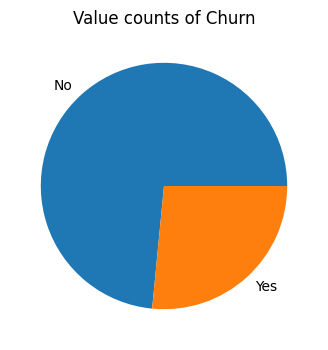

In [9]:
# Exploratory analysis on Churn data
import matplotlib.pyplot as plt
value_counts_churn = data['Churn'].value_counts()
value_counts_churn
value_counts_churn.plot(kind='pie', figsize=(4,4))
plt.title('Value counts of Churn')
plt.ylabel('')
plt.show()

In [10]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


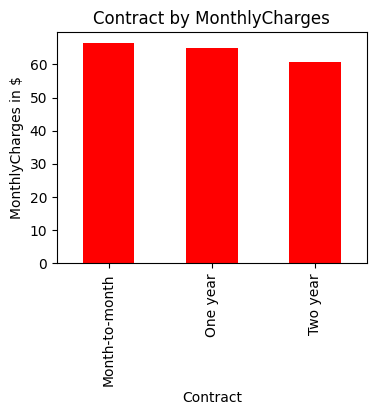

In [11]:
# Plotting Churn against Monthly Charges
data.groupby('Churn')['MonthlyCharges'].mean()
data.groupby(['Churn', 'gender'])['MonthlyCharges'].mean()
data.groupby('Contract')['MonthlyCharges'].mean().plot(kind='bar', figsize=(4,3), color='red')
plt.title('Contract by MonthlyCharges')
plt.ylabel('MonthlyCharges in $')
plt.show()

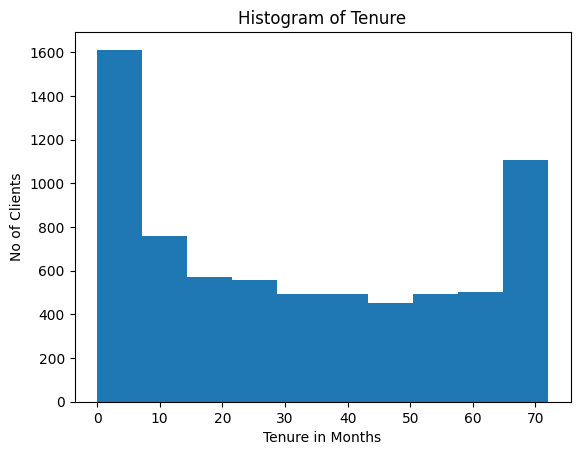

In [12]:
# Exploratory analysis on Tenure data, we can see over 1000+ customers have spent 70 months with the company
plt.hist(data['tenure'])
plt.title('Histogram of Tenure')
plt.ylabel('No of Clients')
plt.xlabel('Tenure in Months')
plt.show()


SETTING TARGET AND FEATURE VALUES

In [13]:
# Exploratory analysis on Dependencies
data['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [14]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
#Setting feature and target value
y = data[['Churn']]
X = data[['gender', 'tenure', 'MonthlyCharges', 'Dependents', 'Contract']]
X

,gender,tenure,MonthlyCharges,Dependents,Contract
0,Female,1,29.85,No,Month-to-month
1,Male,34,56.95,No,One year
2,Male,2,53.85,No,Month-to-month
3,Male,45,42.30,No,One year
4,Female,2,70.70,No,Month-to-month
...,...,...,...,...,...
7038,Male,24,84.80,Yes,One year
7039,Female,72,103.20,Yes,One year
7040,Female,11,29.60,Yes,Month-to-month
7041,Male,4,74.40,No,Month-to-month


In [16]:
# Enconding gender, Male & Female into 1 and 0
X['gender'] = X['gender'].apply(lambda x: 1 if x == 'Female' else 0)
X[['gender']]

C:\Users\MY PC\AppData\Local\Temp\ipykernel_12992\3234295910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].apply(lambda x: 1 if x == 'Female' else 0)


,gender
0,1
1,0
2,0
3,0
4,1
...,...
7038,0
7039,1
7040,1
7041,0


In [17]:
X['gender'].value_counts()

gender
0    3555
1    3488
Name: count, dtype: int64

In [18]:
# Encoding Dependents, Yes & No, into 1 and 0
X['Dependents'] = X['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
X['Dependents']

C:\Users\MY PC\AppData\Local\Temp\ipykernel_12992\2410230127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dependents'] = X['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)


0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7043, dtype: int64

In [19]:
X['Dependents'].value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

In [20]:
X

,gender,tenure,MonthlyCharges,Dependents,Contract
0,1,1,29.85,0,Month-to-month
1,0,34,56.95,0,One year
2,0,2,53.85,0,Month-to-month
3,0,45,42.30,0,One year
4,1,2,70.70,0,Month-to-month
...,...,...,...,...,...
7038,0,24,84.80,1,One year
7039,1,72,103.20,1,One year
7040,1,11,29.60,1,Month-to-month
7041,0,4,74.40,0,Month-to-month


In [21]:
# Encoding Contract types, Month-to-Month, One-year & Two-Years into 0, 1 & 2
X['Contract'] = X['Contract'].apply(lambda x: 0 if x == 'Month-to-month'else (1 if x == 'One year' else 2))
X['Contract']

C:\Users\MY PC\AppData\Local\Temp\ipykernel_12992\2218084510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Contract'] = X['Contract'].apply(lambda x: 0 if x == 'Month-to-month'else (1 if x == 'One year' else 2))


0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract, Length: 7043, dtype: int64

In [22]:
X['Contract'].value_counts()

Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64

In [23]:
X

,gender,tenure,MonthlyCharges,Dependents,Contract
0,1,1,29.85,0,0
1,0,34,56.95,0,1
2,0,2,53.85,0,0
3,0,45,42.30,0,1
4,1,2,70.70,0,0
...,...,...,...,...,...
7038,0,24,84.80,1,1
7039,1,72,103.20,1,1
7040,1,11,29.60,1,0
7041,0,4,74.40,0,0


In [24]:
# Encoding Churn, Yes & No, into 0 and 1
y
y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_12992\4246403412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [25]:
y['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [26]:
print(X,y)

      gender  tenure  MonthlyCharges  Dependents  Contract
0          1       1           29.85           0         0
1          0      34           56.95           0         1
2          0       2           53.85           0         0
3          0      45           42.30           0         1
4          1       2           70.70           0         0
...      ...     ...             ...         ...       ...
7038       0      24           84.80           1         1
7039       1      72          103.20           1         1
7040       1      11           29.60           1         0
7041       0       4           74.40           0         0
7042       0      66          105.65           0         2

[7043 rows x 5 columns]       Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]


MACHINE LEARNING


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Scale the X_train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train_scaled

array([[ 1.00855631,  1.44788652,  0.80860955,  1.52250491,  1.57301729],
       [-0.99151628,  1.04146983, -0.48815868,  1.52250491,  0.37264083],
       [ 1.00855631, -0.29970526,  0.31879312, -0.65681233,  0.37264083],
       ...,
       [-0.99151628, -1.27510533, -1.46779153, -0.65681233, -0.82773563],
       [-0.99151628, -1.03125531,  0.32045352, -0.65681233, -0.82773563],
       [-0.99151628, -0.01521357,  0.63094732,  1.52250491,  0.37264083]],
      shape=(5634, 5))

In [ ]:
# Saving the scaled Data with Joblib
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Scaling the X test Data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Writng a funtion to calculate the accuracy score of each model 
from sklearn.metrics import accuracy_score
def testing_accuracy(predictions):
    print('Accuracy score of the model is {}'.format(accuracy_score(y_test, predictions)))

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
logistic_pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())]
)

parameters_logistics = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__max_iter': [100, 200, 500]
}

logistic_regression_model = GridSearchCV(logistic_pipeline, parameters_logistics, cv=5, scoring = 'accuracy')

In [ ]:
# fitting the scaled X train data and y train data into the model
logistic_regression_model.fit(X_train_scaled, y_train)


In [ ]:
# using the scaled X test data to run predictions
prediction_1 = logistic_regression_model.predict(X_test_scaled)

In [ ]:
# testing the accuracy score
testing_accuracy(prediction_1)

NameError: name 'testing_accuracy' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

parameters_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

knn_model = GridSearchCV(knn_pipeline, parameters_knn, cv=5, scoring='accuracy')

In [ ]:
# fitting the scaled X train data and y train data into the model
knn_model.fit(X_train_scaled, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'classifier__metric': ['euclidean', 'manhattan'], 'classifier__n_neighbors': [3, 5, ...], 'classifier__weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [ ]:
# using the scaled X test data to run predictions
prediction_2 = knn_model.predict(X_test_scaled)

In [ ]:
testing_accuracy(prediction_2)

Accuracy score of the model is 0.7814052519517388


In [ ]:
from sklearn.svm import SVC
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

parameters_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

svm_model = GridSearchCV(svm_pipeline, parameters_svm, cv=5, scoring = 'accuracy')

In [ ]:
# fitting the scaled X train data and y train data into the model
svm_model.fit(X_train_scaled, y_train)

In [ ]:
# using the scaled X test data to run predictions
prediction_3 = svm_model.predict(X_test_scaled)

In [ ]:
testing_accuracy(prediction_3)

Accuracy score of the model is 0.7856635911994322


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

parameters_decisiontree = {
     'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

decision_tree_model = GridSearchCV(decision_tree_pipeline, parameters_decisiontree, cv=5, scoring = 'accuracy')



In [ ]:
# fitting the scaled X train data and y train data into the model
decision_tree_model.fit(X_train_scaled, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'classifier__max_depth': [3, 5, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [ ]:
# using the scaled X test data to run predictions
prediction_4 = decision_tree_model.predict(X_test_scaled)

In [ ]:
testing_accuracy(prediction_4)

Accuracy score of the model is 0.7785663591199432


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier_pipeline = Pipeline ([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])

parameters_randomclassifier = {
}

random_classifier_model = GridSearchCV(RandomForestClassifier(), parameters_randomclassifier, cv=5, scoring = 'accuracy')


In [ ]:
# fitting the scaled X train data and y train data into the model
random_classifier_model.fit(X_train_scaled, y_train)

,estimator,RandomForestClassifier()
,param_grid,{}
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
# using the scaled X test data to run predictions
prediction_5 = random_classifier_model.predict(X_test_scaled)

In [ ]:
testing_accuracy(prediction_5)

Accuracy score of the model is 0.7700496806245565


In [ ]:
print(testing_accuracy(prediction_1), testing_accuracy(prediction_2), testing_accuracy(prediction_3), testing_accuracy(prediction_4), testing_accuracy(prediction_5))

Accuracy score of the model is 0.7856635911994322
Accuracy score of the model is 0.7814052519517388
Accuracy score of the model is 0.7856635911994322
Accuracy score of the model is 0.7785663591199432
Accuracy score of the model is 0.7700496806245565
None None None None None


In [ ]:
best_model = svm_model.best_estimator_

In [ ]:
# saving the best model
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [ ]:
X.columns

Index(['gender', 'tenure', 'MonthlyCharges', 'Dependents', 'Contract'], dtype='object')